In [4]:
import numpy as np  
import pandas as pd

# import scipy

import matplotlib.pyplot as plt # для красивой визуализации
import seaborn as sb # Библиотка для более красивой визуализации

<div class="alert alert-info">

<b>Программа семинара: </b>
    
Описательные статистики. Квантили, квартили.
Гистограммы. Ядерная оценка плотности. 
Ящики с усами. Выбросы


</div>



In [5]:
# Демонстрационный датасет с набором характеристикам машин и их рыночной ценой

data = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/CarPrice_Assignment.csv', sep=',')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Описательные статистики

* Среднее арифметическое - ...

<p style="align: center;"><img align=center src="http://statistica.ru/upload/medialibrary/45b/4.png"  width=90></p>

In [24]:
sum(data['price'][:10])/len(data['price'][:10])

17150.9167

* Среднее геометрическое

<p style="align: center;"><img align=center src="https://studfile.net/html/2706/35/html_tIWj_IZuFn.p1cL/img-bgfII7.png"  width=340></p>

In [21]:
def geo_mean(iterable): # Реализация на Python
    a = np.array(iterable)
    return a.prod()**(1.0/len(a))


In [25]:
geo_mean(data['price'].values[:10])

16942.303338665733

* Cреднее взвешенное

<p style="align: center;"><img align=center src="http://statistica.ru/upload/medialibrary/69c/7.png"  width=340></p>

* Медиана - такая точка, слева и справа, от которой лежит 50% точек
* Мода - наиболее часто встречающее значение.
* Размах (интервал изменения) - это разность между максимальным и минимальным значениями переменной в наборе данных; этими двумя величинами обозначают их разность.


* Дисперсия

<p style="align: center;"><img align=center src="https://konspekta.net/studopediaorg/baza14/3632062117130.files/image014.png"  width=200></p>


In [28]:
m = data.price.mean()

sum(((data.price - m)**2))/(len(data.price )-1)


63821761.57839796

In [33]:
data.price.var()

63821761.57839796

* Стандартное отклонение выборки - корень из дисперсии

<p style="align: center;"><img align=center src="https://konspekta.net/studopediaorg/baza14/3632062117130.files/image013.png"  width=200></p>


In [31]:
data.price.std()

7988.85233174315

# Квантили, квартил, процентил и медиана

<div class="alert alert-info">

<!-- <b>Программа семинара: </b> -->
    
**Кванти́ль** — значение, которое заданная случайная величина не превышает с фиксированной вероятностью.

**Пример:** 80%-й квантиль выхода из строя станков на заводе равен три года - Это фраза значит, что 80% станков выходит из строя в течение первых трех лет, остальные 20% станков работают больше 3 лет


</div>




<p style="align: center;"><img align=center src="https://present5.com/presentation/3/120980285_176628086.pdf-img/120980285_176628086.pdf-43.jpg"  width=500></p>


<div class="alert alert-info">

**Квартиль** - это квантиль кратный 0.25 (четверти) 
    
    
**Процентиль** - это квантиль выраженный в процентах. Пример 40% процентиль или 0.40 квантиль

**Размах**, полученный из процентилей - растояние между двуменя процентилями    
    
</div>



In [ ]:
np.quantile(data['price'], 0.5) # 

# Гистограммы

<p style="align: center;"><img align=center src="https://lh3.googleusercontent.com/proxy/2uKNOa0OGd15FAK63EBnAzmYHgC5dfndxkowzeZRsVOJvcBPOat1yhdDk6GCL-wUPg9iwKPv-3Q5IVk_JPe_TsE1-NDOOqlaOYI"  width=500></p>


In [40]:
norm = np.random.normal(0, 1, 1000)  # Сгенерируем нормальное распределение
unif = np.random.uniform(0, 100, 10000) # Сгенерируем равномерное распределение

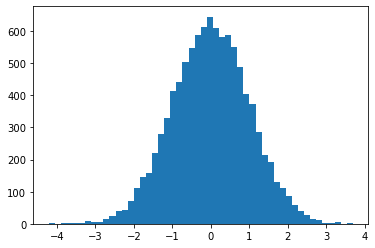

In [34]:
plt.hist(norm, bins=50);

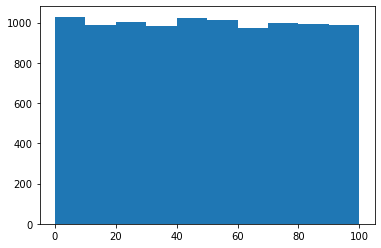

In [8]:
plt.hist(unif);

## Чем плоха гистограмма?

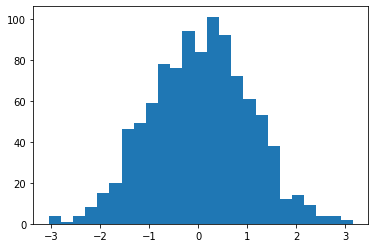

In [43]:
plt.hist(norm, bins=25);

# Ядерная оценка плотности





<div class="alert alert-info">

<b>Идея: </b>
   
Строя гистограмму распределения мы пытаемся определить плотность распределения. У гистограммы есть ряд недочетов (например нет гладкости, нарушается симметричность), которые можно улучшить с помощью ядерной оценки плотности.     
 
Ядерная оценка плотности это улучшенная версия гистограммы. Гистограмма сглаживается приближающей кривой
    
</div>






In [44]:
d = np.random.normal(-3, 1, 1000) 

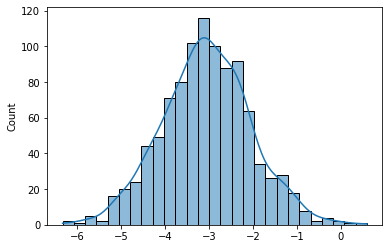

In [47]:
sb.histplot(d, kde=True) # kde
plt.show()


<div class="alert alert-info">
<b>Какая тут математика под капотом? </b>
   
    
    
<b>Гистограмма: </b>
    
$$ f_n(x) = \frac{1}{n*h}\sum[z_k < x_i < z_{k+1}] $$ 
    

Границы фиксированы   
    

<div class="alert alert-info">
    
<b>Улучшение: </b>
    
$$ f_n(x) = \frac{1}{n*h}\sum[x_{i-1}- 0.5h< x_i < x_{i+1} + 0.5h] $$
   
Тут уже скользящие границы, h - ширина окна

</div>

<div class="alert alert-info">
    
<b>Улучшение: </b>
    
$$ f_n(x) = \frac{1}{n*h}\sum K(\frac{x-x_i}{h})$$
    
$$ K(z) = [-\frac{1}{2} < z < \frac{1}{2}]$$
    
K - ядро/индикатор. Обычно в качестве K берут функцию Гауса.
    
    
Главные условия на K:
* Положительность
* Интеграл всех значения весов равен 1


</div>

# Ящики с усами. 

## Где тут усы? Где тут выбросы?

<p style="align: center;"><img align=center src="https://static.tildacdn.com/tild3366-6434-4530-a163-613065363237/boxplot.jpg"  width=1000></p>



### Или более подробное его описание: 

<p style="align: center;"><img align=center src="https://lh3.googleusercontent.com/proxy/MXzaibhHOlE6D35a_w2rGCGZJEv7OjWu0F06Hq4YggZUrmCRjbWO__fqu3f-P3JbhZKPpJSExEm4GI8a7MFRDqdlwVA"  width=1000></p>



Выброс — это такая точка, которая существенно отличается от большинства значений, взятых из выборки или совокупности. Есть множество возможных причин появления выбросов и вот для начала только несколько:

* Естественные выбросы данных.
* Изменение поведения наблюдаемой системы.
* Ошибки при сборе данных.

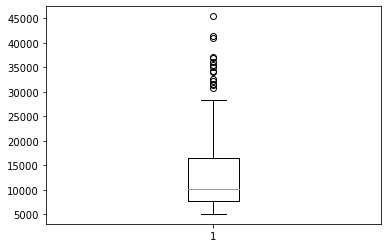

In [50]:
plt.boxplot(data['price']);

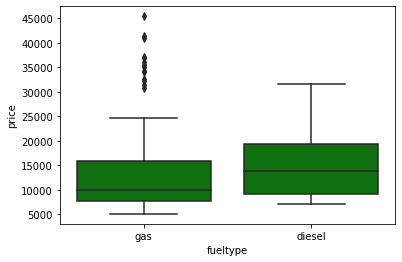

In [12]:
sb.boxplot(data = data, y = 'price', color='g', x = 'fueltype');

In [7]:
def my_func(x):    
    return max(x)

data.groupby('fueltype', as_index=False).agg({'price':'mean',
                                              'horsepower': my_func,
                                              })

,fueltype,price,horsepower
0,diesel,15838.1500,123
1,gas,12999.7982,288


<div class="alert alert-info">
    
<b>Зачем? </b>
    
* Легко читаются основные статистики
* Четко видно, где выбросы
* Хорошо оценивается степень асимметрии и разброса данных
* Бесценен, когда мало данных


</div>

<p style="align: center;"><img align=center src="https://static.tildacdn.com/tild6533-3362-4632-b632-333165363837/image.png"  width=900></p>


# Дополнительно
* Про ядерную оценку плотности https://www.coursera.org/lecture/data-collection-and-analysis-in-python/iadiernyie-otsienki-plotnosti-EOcqZ
* Про боксплоты из библиотеки seaborn: https://seaborn.pydata.org/generated/seaborn.boxplot.html
* Подробнее про статистики: http://statistica.ru/theory/opisatelnye-statistiki/
* Источник датасета: https://www.kaggle.com/c/data-mining-fall-2018/data